In [17]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
adata_combined = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_combined.h5ad")

In [ ]:
##sample names are: m5,p5_1,p5_2,m4,p5

In [8]:
#set result directory
sc.settings.figdir = "/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/results"

In [18]:
gray_green = LinearSegmentedColormap.from_list(
    "gray_green", ["#D3D3D3", "#02500e", "#001203"]
)

In [4]:
adata_raw = adata_combined.copy() 
adata_transformed = adata_combined.copy() 

In [ ]:
#testing different clusterings
#n_pcs_list = [15,17,25,30]
n_pcs_list = [20,27,35,40]
#n_neighbors_list = [15,25]
n_neighbors_list = [35,45]
adata_transformed = adata_combined.copy() 
sc.pp.normalize_total(adata_transformed, target_sum=1e4) 
sc.pp.log1p(adata_transformed)
sc.tl.pca(adata_transformed, n_comps=50)

n_rows = len(n_pcs_list)
n_cols = len(n_neighbors_list)


fig_width = n_cols * 6
fig_height = n_rows * 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), sharex=True, sharey=True)


point_size = max(10, 60 - 5 * max(n_rows, n_cols))

for row, n_pcs in enumerate(n_pcs_list):
    for col, n_neighbors in enumerate(n_neighbors_list):
        ax = axes[row, col]
        adata_temp = adata_transformed.copy()
        sc.pp.neighbors(adata_temp, n_neighbors=n_neighbors, n_pcs=n_pcs)
        sc.tl.umap(adata_temp, min_dist=0.1, spread=1.2)
        sc.tl.leiden(adata_temp,resolution=0.5)
        
        sc.pl.umap(
            adata_temp,
            color="leiden",
            title=f"pcs={n_pcs}, nn={n_neighbors}",
            cmap="viridis",
            ax=ax,
            show=False)
        
for ax in axes.flat:
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

In [ ]:
#testing different spacing
min_dist_list = [0.05,0.01,0.5]
#min_dist_list = [0.005,0.001,0.0005]
spread_list = [1,1.2,1.5]
#spread_list = [1.8,2,2.2]
adata_transformed = adata_combined.copy() 
sc.pp.normalize_total(adata_transformed, target_sum=1e4) 
sc.pp.log1p(adata_transformed)
sc.tl.pca(adata_transformed, n_comps=50)


n_rows = len(min_dist_list)
n_cols = len(spread_list)

fig_width = n_cols * 6
fig_height = n_rows * 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), sharex=True, sharey=True)

point_size = max(10, 60 - 5 * max(n_rows, n_cols))

for row, min_dist in enumerate(min_dist_list):
    for col, spread in enumerate(spread_list):
        ax = axes[row, col]
        adata_temp = adata_transformed.copy()
        

        sc.tl.pca(adata_temp, n_comps=50)        
        sc.pp.neighbors(adata_temp, n_pcs=15,n_neighbors=35)
        sc.tl.umap(adata_temp, min_dist=min_dist, spread=spread)
        sc.tl.leiden(adata_temp,resolution=0.5)
        
        sc.pl.umap(
            adata_temp,
            color="leiden",
            title=f"(15,30) min_dist={min_dist}, spread={spread}",
            cmap="viridis",
            ax=ax,
            show=False,
            size=point_size
        )

for ax in axes.flat:
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

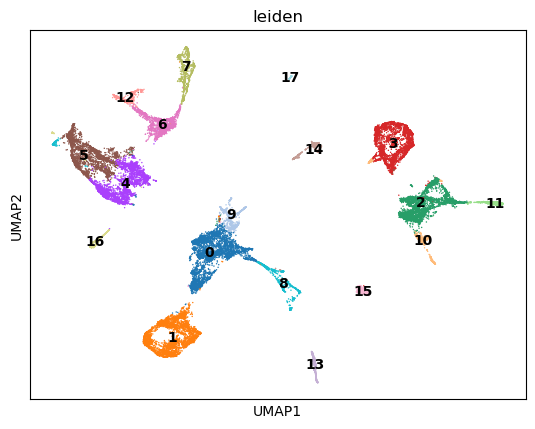

In [22]:
#decided clustering combination
n_pcs=27
n_neighbors=25
min_dist=0.005
spread=1
adata_transformed = adata_combined.copy() 
sc.pp.normalize_total(adata_transformed, target_sum=1e4) 
sc.pp.log1p(adata_transformed)
sc.tl.pca(adata_transformed, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata_transformed, n_pcs=n_pcs, n_neighbors=n_neighbors)
sc.tl.umap(adata_transformed,min_dist=min_dist, spread=spread)
sc.tl.leiden(adata_transformed,resolution=0.5)
sc.pl.umap(adata_transformed,color="leiden",cmap="viridis", 
          legend_loc="on data",
         #save=f"_combined_umap_({n_pcs},{n_neighbors})_({min_dist},{spread}).pdf"
          )

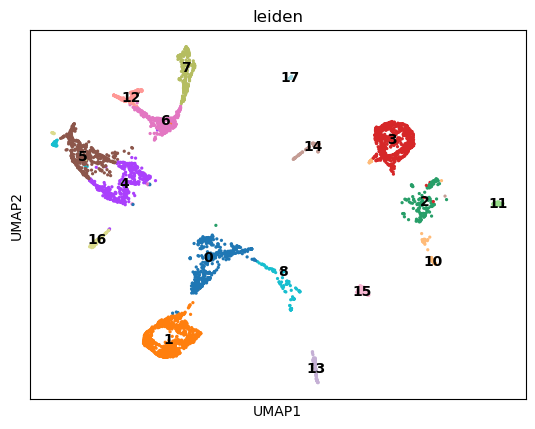

In [26]:
#selecting out a certain sample
sample='m4'
adata_sample = adata_transformed[adata_transformed.obs["sample"] == f"{sample}"].copy()
sc.pl.umap(adata_sample,color="leiden",cmap="viridis", 
          legend_loc="on data",
         #save=f"_{sample}_combined_umap.pdf"
          )

In [ ]:
#testing gene on different samples
gene="calb2a"
for sample in adata_transformed.obs["sample"].unique():
    sc.pl.umap(
        adata_transformed[adata_transformed.obs["sample"] == sample],
        color=gene,
        title=f"{sample}-{gene}",
        show=True,
        cmap=gray_green,
       #save=f"_combined_gene_umap_{sample}-{gene}.pdf 
    )

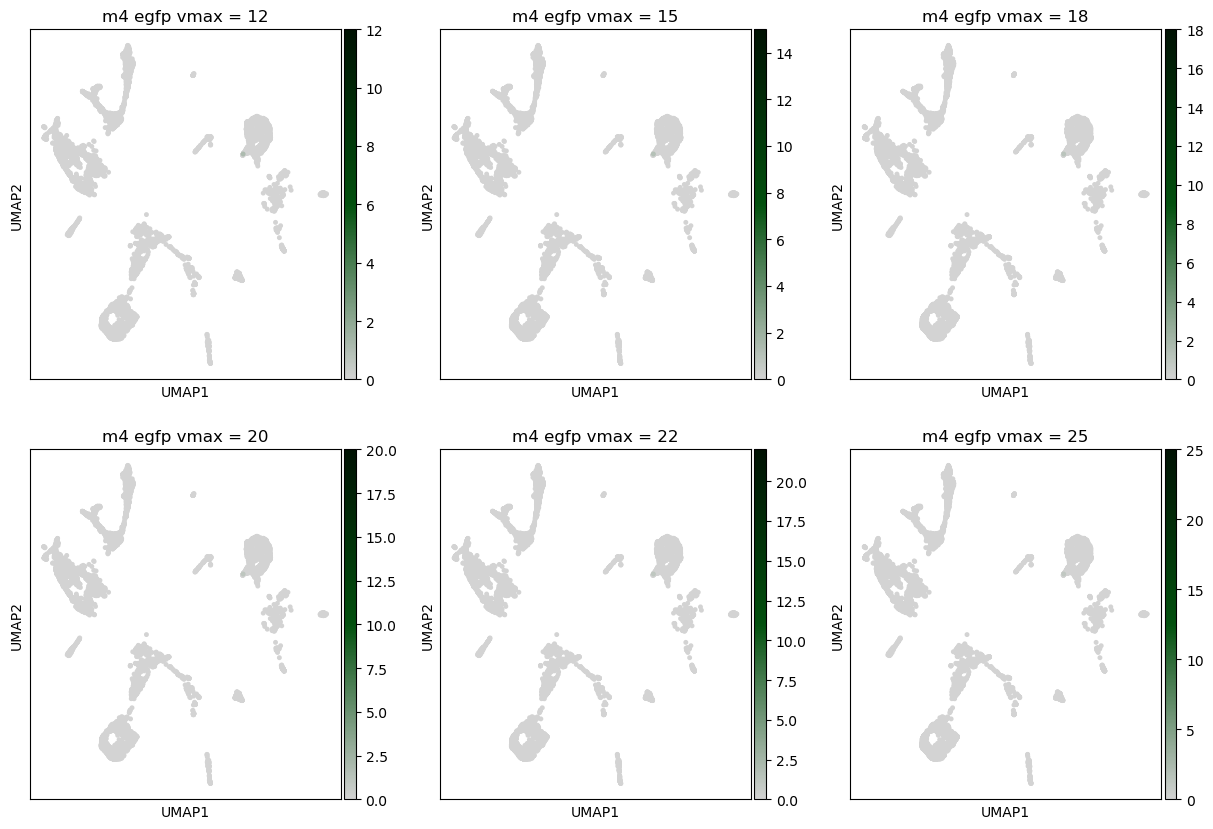

In [27]:
#testing different vmax on same sample
sample='m4'
adata_sample = adata_transformed[adata_transformed.obs["sample"] == f"{sample}"].copy()

vmax_values = [12,15,18,20,22,25]
#vmax_values = [2,5,8,10,12,6]

ncols = 3
nrows = (len(vmax_values) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

axes = axes.flatten()

for i, vmax in enumerate(vmax_values):
    ax = axes[i]
    sc.pl.umap(
        adata_sample,
        color="egfp",
        vmin=0,
        vmax=vmax,
        size=50,
        title=f"{sample} egfp vmax = {vmax}",
        cmap=gray_green,
        show=False,
        ax=ax  
    )

In [ ]:
sample='m4'
gene='egfp'
adata_sample = adata_transformed[adata_transformed.obs["sample"] == f"{sample}"].copy()
sc.pl.umap(
    adata_sample,
    color=gene,
    vmin=0,
    vmax=18,
    size=50,
    title=f'{sample}_{gene}',
    cmap=gray_softorange_orangered,
    #save=f"_full_umap_{sample}_{gene}.pdf"
)

In [28]:
adata_transformed.write("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_transformed.h5ad")